## Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho đồ thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

---
# Phần 1: Bài toán Phân loại - Dry Bean Dataset

## 1.1. Giới thiệu Dataset
Dataset chứa thông tin về 7 loại đậu khô với 16 đặc trưng hình học:
- **Area**: Diện tích
- **Perimeter**: Chu vi
- **MajorAxisLength**: Chiều dài trục chính
- **MinorAxisLength**: Chiều dài trục phụ
- Và 12 đặc trưng khác...

## 1.2. Load và Khám phá dữ liệu

In [3]:
# Load dataset
df_beans = pd.read_csv('Dry_Bean_Dataset.csv')

# Hiển thị thông tin cơ bản
print("=" * 60)
print("THÔNG TIN DATASET DRY BEAN")
print("=" * 60)
print(f"Số lượng mẫu: {df_beans.shape[0]}")
print(f"Số lượng đặc trưng: {df_beans.shape[1] - 1}")
print(f"\nCác cột: {list(df_beans.columns)}")
print(f"\nCác loại đậu: {df_beans['Class'].unique()}")
print(f"Số lượng loại đậu: {df_beans['Class'].nunique()}")

# Hiển thị mẫu dữ liệu
print("\n" + "="*60)
print("5 MẪU ĐẦU TIÊN")
print("="*60)
df_beans.head()

THÔNG TIN DATASET DRY BEAN
Số lượng mẫu: 13611
Số lượng đặc trưng: 16

Các cột: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

Các loại đậu: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
Số lượng loại đậu: 7

5 MẪU ĐẦU TIÊN


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Thống kê mô tả
print("=" * 60)
print("THỐNG KÊ MÔ TẢ")
print("=" * 60)
df_beans.describe()

THỐNG KÊ MÔ TẢ


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
# Kiểm tra missing values
print("=" * 60)
print("KIỂM TRA MISSING VALUES")
print("=" * 60)
print(f"Tổng missing values: {df_beans.isnull().sum().sum()}")
print(f"\nMissing values theo cột:")
print(df_beans.isnull().sum())

KIỂM TRA MISSING VALUES
Tổng missing values: 0

Missing values theo cột:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


PHÂN BỐ CÁC LỚP
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Tỷ lệ phần trăm:
Class
DERMASON    26.052458
SIRA        19.366689
SEKER       14.892366
HOROZ       14.165014
CALI        11.975608
BARBUNYA     9.712732
BOMBAY       3.835133
Name: proportion, dtype: float64


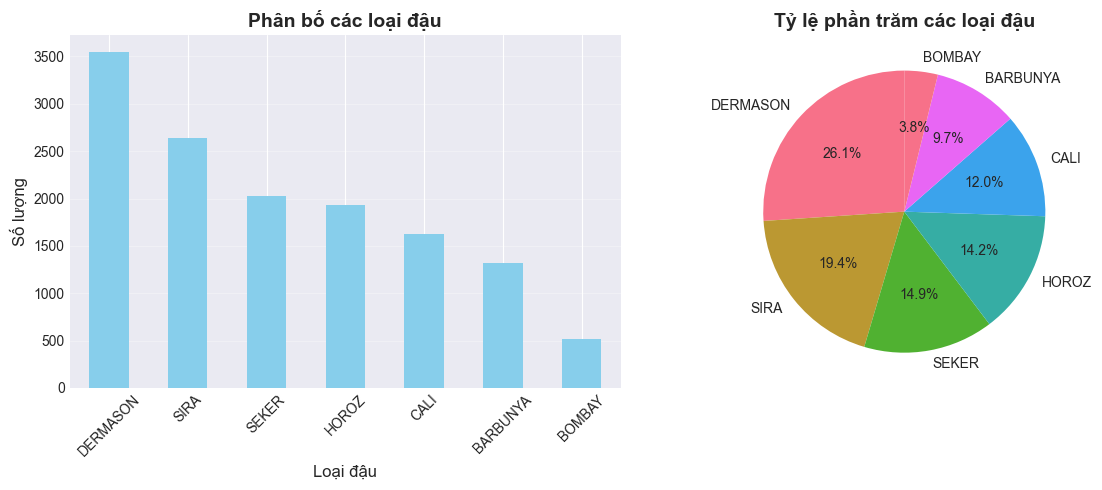

In [6]:
# Phân bố các lớp
print("=" * 60)
print("PHÂN BỐ CÁC LỚP")
print("=" * 60)
class_counts = df_beans['Class'].value_counts()
print(class_counts)
print(f"\nTỷ lệ phần trăm:")
print(df_beans['Class'].value_counts(normalize=True) * 100)

# Vẽ biểu đồ phân bố
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_beans['Class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phân bố các loại đậu', fontsize=14, fontweight='bold')
plt.xlabel('Loại đậu', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ phần trăm các loại đậu', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 1.3. Tiền xử lý dữ liệu

In [7]:
# Tách features và target
X_beans = df_beans.drop('Class', axis=1)
y_beans = df_beans['Class']

print("=" * 60)
print("THÔNG TIN SAU KHI TÁCH DỮ LIỆU")
print("=" * 60)
print(f"Shape của X: {X_beans.shape}")
print(f"Shape của y: {y_beans.shape}")
print(f"\nCác đặc trưng: {list(X_beans.columns)}")

THÔNG TIN SAU KHI TÁCH DỮ LIỆU
Shape của X: (13611, 16)
Shape của y: (13611,)

Các đặc trưng: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [8]:
# Encode labels
le_beans = LabelEncoder()
y_beans_encoded = le_beans.fit_transform(y_beans)

print("=" * 60)
print("LABEL ENCODING")
print("=" * 60)
print("Mapping của các lớp:")
for i, class_name in enumerate(le_beans.classes_):
    print(f"{class_name}: {i}")

LABEL ENCODING
Mapping của các lớp:
BARBUNYA: 0
BOMBAY: 1
CALI: 2
DERMASON: 3
HOROZ: 4
SEKER: 5
SIRA: 6


In [9]:
# Chia train-test với tỷ lệ 80-20
X_train_beans, X_test_beans, y_train_beans, y_test_beans = train_test_split(
    X_beans, y_beans_encoded, test_size=0.2, random_state=42, stratify=y_beans_encoded
)

print("=" * 60)
print("CHIA TRAIN-TEST SET")
print("=" * 60)
print(f"Training set: {X_train_beans.shape[0]} mẫu ({X_train_beans.shape[0]/len(X_beans)*100:.1f}%)")
print(f"Test set: {X_test_beans.shape[0]} mẫu ({X_test_beans.shape[0]/len(X_beans)*100:.1f}%)")
print(f"\nPhân bố lớp trong training set:")
print(pd.Series(y_train_beans).value_counts().sort_index())
print(f"\nPhân bố lớp trong test set:")
print(pd.Series(y_test_beans).value_counts().sort_index())

CHIA TRAIN-TEST SET
Training set: 10888 mẫu (80.0%)
Test set: 2723 mẫu (20.0%)

Phân bố lớp trong training set:
0    1057
1     418
2    1304
3    2837
4    1542
5    1621
6    2109
Name: count, dtype: int64

Phân bố lớp trong test set:
0    265
1    104
2    326
3    709
4    386
5    406
6    527
Name: count, dtype: int64


In [10]:
# Chuẩn hóa dữ liệu (Feature Scaling)
scaler_beans = StandardScaler()
X_train_beans_scaled = scaler_beans.fit_transform(X_train_beans)
X_test_beans_scaled = scaler_beans.transform(X_test_beans)

print("=" * 60)
print("CHUẨN HÓA DỮ LIỆU (StandardScaler)")
print("=" * 60)
print(f"\nTrước khi chuẩn hóa:")
print(f"Mean: {X_train_beans.mean().mean():.2f}")
print(f"Std: {X_train_beans.std().mean():.2f}")
print(f"\nSau khi chuẩn hóa:")
print(f"Mean: {X_train_beans_scaled.mean():.6f}")
print(f"Std: {X_train_beans_scaled.std():.6f}")

CHUẨN HÓA DỮ LIỆU (StandardScaler)

Trước khi chuẩn hóa:
Mean: 6774.59
Std: 3714.21

Sau khi chuẩn hóa:
Mean: 0.000000
Std: 1.000000


## 1.4. Xây dựng và Huấn luyện MLP Classifier

### Giải thích các tham số:
- **hidden_layer_sizes**: Số neurons trong các hidden layers (100, 50) = 2 layers với 100 và 50 neurons
- **activation**: Hàm kích hoạt ('relu', 'logistic', 'tanh')
- **solver**: Thuật toán tối ưu ('adam', 'sgd', 'lbfgs')
- **alpha**: Hệ số regularization L2
- **max_iter**: Số epoch tối đa
- **learning_rate_init**: Learning rate ban đầu

In [11]:
# Khởi tạo MLP Classifier
mlp_beans = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # 2 hidden layers: 100 và 50 neurons
    activation='relu',             # Hàm kích hoạt ReLU
    solver='adam',                 # Optimizer Adam
    alpha=0.0001,                  # L2 regularization
    batch_size='auto',             # Batch size tự động
    learning_rate='adaptive',      # Learning rate thích nghi
    learning_rate_init=0.001,      # Learning rate ban đầu
    max_iter=500,                  # Số epoch tối đa
    random_state=42,
    verbose=True,                  # Hiển thị quá trình training
    early_stopping=True,           # Dừng sớm nếu không cải thiện
    validation_fraction=0.1        # 10% training set làm validation
)

print("=" * 60)
print("CẤU TRÚC MLP CLASSIFIER")
print("=" * 60)
print(f"Input layer: {X_train_beans_scaled.shape[1]} neurons")
print(f"Hidden layer 1: 100 neurons (ReLU)")
print(f"Hidden layer 2: 50 neurons (ReLU)")
print(f"Output layer: {len(np.unique(y_train_beans))} neurons (Softmax)")
print(f"\nOptimizer: Adam")
print(f"Learning rate: 0.001 (adaptive)")
print(f"Regularization: L2 (alpha=0.0001)")
print(f"Max iterations: 500")
print(f"Early stopping: Yes")
print("\n" + "="*60)
print("BẮT ĐẦU HUẤN LUYỆN MÔ HÌNH")
print("="*60)

CẤU TRÚC MLP CLASSIFIER
Input layer: 16 neurons
Hidden layer 1: 100 neurons (ReLU)
Hidden layer 2: 50 neurons (ReLU)
Output layer: 7 neurons (Softmax)

Optimizer: Adam
Learning rate: 0.001 (adaptive)
Regularization: L2 (alpha=0.0001)
Max iterations: 500
Early stopping: Yes

BẮT ĐẦU HUẤN LUYỆN MÔ HÌNH


In [12]:
# Huấn luyện mô hình
mlp_beans.fit(X_train_beans_scaled, y_train_beans)

print("\n" + "="*60)
print("HOÀN THÀNH HUẤN LUYỆN")
print("="*60)
print(f"Số iterations thực tế: {mlp_beans.n_iter_}")
print(f"Loss cuối cùng: {mlp_beans.loss_:.6f}")
print(f"Số layers: {mlp_beans.n_layers_}")

Iteration 1, loss = 1.17990148
Validation score: 0.869605
Iteration 2, loss = 0.40638630
Validation score: 0.907254
Iteration 3, loss = 0.25991567
Validation score: 0.914601
Iteration 4, loss = 0.22661119
Validation score: 0.917355
Iteration 5, loss = 0.21156750
Validation score: 0.918274
Iteration 6, loss = 0.20444112
Validation score: 0.923783
Iteration 7, loss = 0.20108071
Validation score: 0.921028
Iteration 8, loss = 0.19633103
Validation score: 0.921028
Iteration 9, loss = 0.19223637
Validation score: 0.927456
Iteration 6, loss = 0.20444112
Validation score: 0.923783
Iteration 7, loss = 0.20108071
Validation score: 0.921028
Iteration 8, loss = 0.19633103
Validation score: 0.921028
Iteration 9, loss = 0.19223637
Validation score: 0.927456
Iteration 10, loss = 0.19133211
Validation score: 0.920110
Iteration 11, loss = 0.18857073
Validation score: 0.924702
Iteration 12, loss = 0.18805730
Validation score: 0.930211
Iteration 13, loss = 0.18591242
Validation score: 0.925620
Iteration 

## 1.5. Đánh giá mô hình

In [13]:
# Dự đoán
y_train_pred_beans = mlp_beans.predict(X_train_beans_scaled)
y_test_pred_beans = mlp_beans.predict(X_test_beans_scaled)

# Tính accuracy
train_accuracy_beans = accuracy_score(y_train_beans, y_train_pred_beans)
test_accuracy_beans = accuracy_score(y_test_beans, y_test_pred_beans)

print("=" * 60)
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH")
print("=" * 60)
print(f"Training Accuracy: {train_accuracy_beans*100:.2f}%")
print(f"Test Accuracy: {test_accuracy_beans*100:.2f}%")
print(f"Overfitting: {(train_accuracy_beans - test_accuracy_beans)*100:.2f}%")

KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH
Training Accuracy: 93.25%
Test Accuracy: 92.36%
Overfitting: 0.89%


In [14]:
# Classification Report chi tiết
print("\n" + "="*60)
print("CLASSIFICATION REPORT (TEST SET)")
print("="*60)
print(classification_report(y_test_beans, y_test_pred_beans, 
                          target_names=le_beans.classes_,
                          digits=4))


CLASSIFICATION REPORT (TEST SET)
              precision    recall  f1-score   support

    BARBUNYA     0.9444    0.8981    0.9207       265
      BOMBAY     1.0000    1.0000    1.0000       104
        CALI     0.9335    0.9479    0.9406       326
    DERMASON     0.9281    0.9097    0.9188       709
       HOROZ     0.9632    0.9482    0.9556       386
       SEKER     0.9265    0.9631    0.9444       406
        SIRA     0.8571    0.8767    0.8668       527

    accuracy                         0.9236      2723
   macro avg     0.9361    0.9348    0.9353      2723
weighted avg     0.9241    0.9236    0.9237      2723



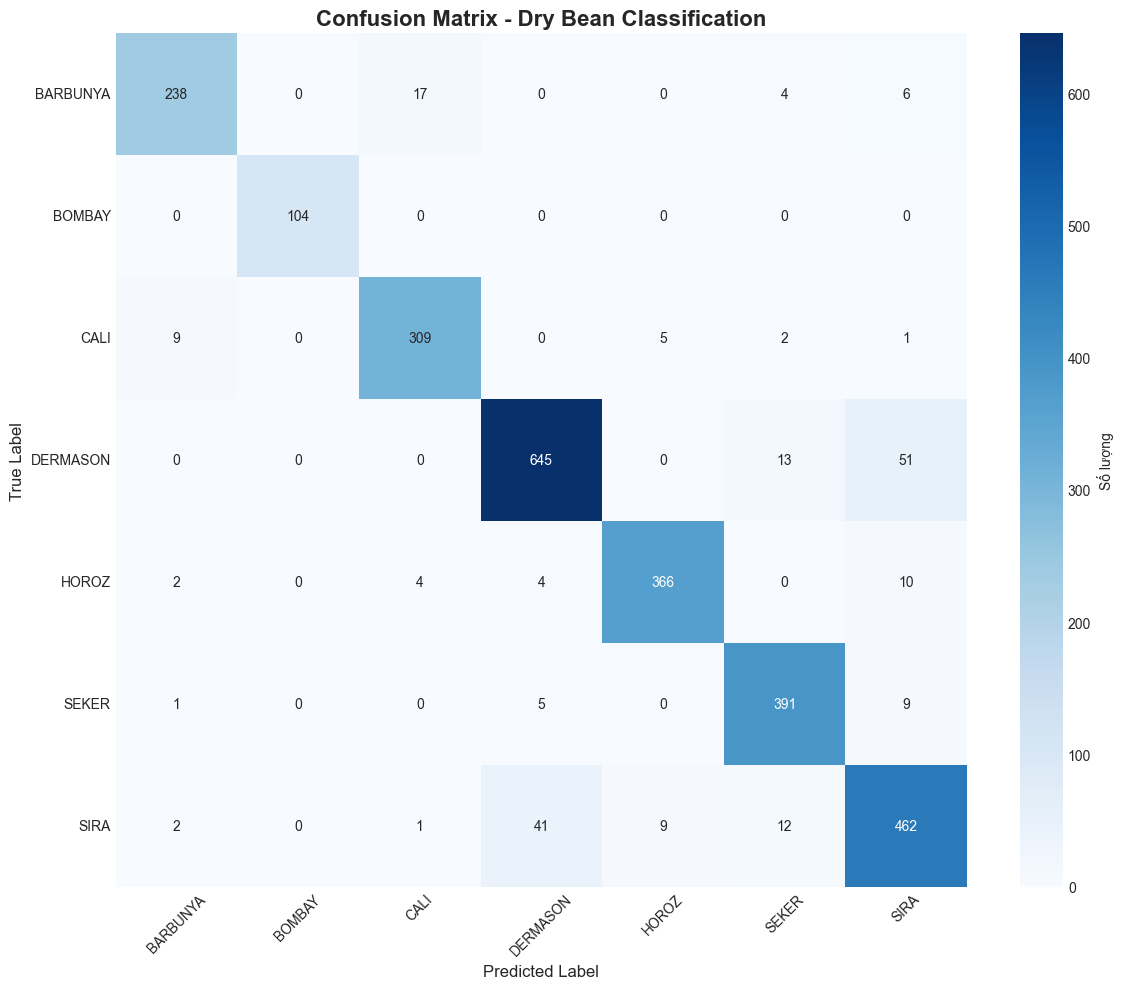


ACCURACY THEO TỪNG LỚP
BARBUNYA: 89.81%
BOMBAY: 100.00%
CALI: 94.79%
DERMASON: 90.97%
HOROZ: 94.82%
SEKER: 96.31%
SIRA: 87.67%


In [15]:
# Confusion Matrix
cm_beans = confusion_matrix(y_test_beans, y_test_pred_beans)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_beans, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_beans.classes_,
            yticklabels=le_beans.classes_,
            cbar_kws={'label': 'Số lượng'})
plt.title('Confusion Matrix - Dry Bean Classification', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Tính accuracy cho từng class
print("\n" + "="*60)
print("ACCURACY THEO TỪNG LỚP")
print("="*60)
for i, class_name in enumerate(le_beans.classes_):
    class_accuracy = cm_beans[i, i] / cm_beans[i].sum() * 100
    print(f"{class_name}: {class_accuracy:.2f}%")

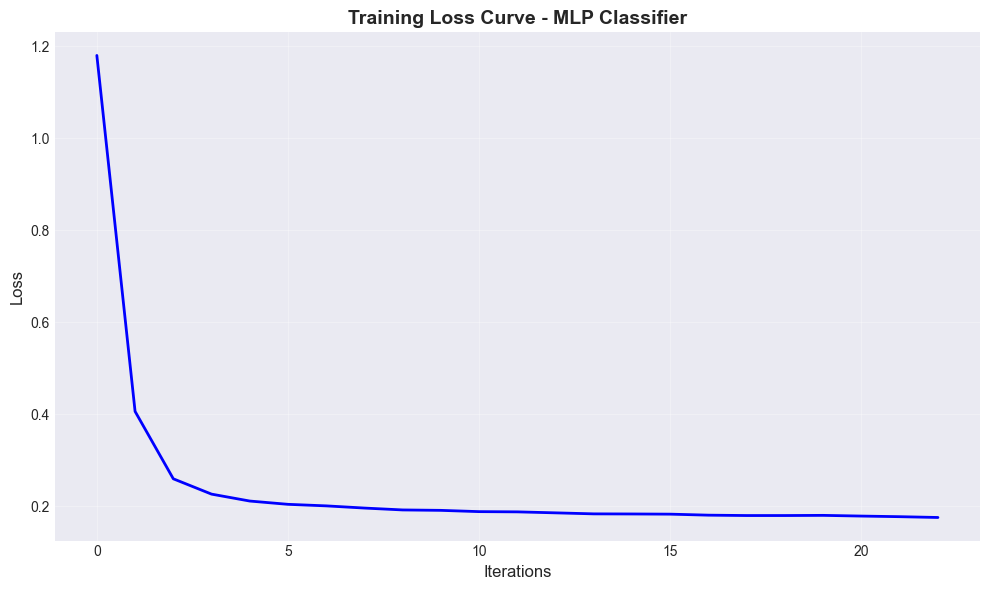

Final Training Loss: 0.175856


In [16]:
# Vẽ đồ thị Loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_beans.loss_curve_, linewidth=2, color='blue')
plt.title('Training Loss Curve - MLP Classifier', fontsize=14, fontweight='bold')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final Training Loss: {mlp_beans.loss_:.6f}")

## 1.6. Thử nghiệm với các cấu hình khác nhau

In [17]:
# So sánh các cấu hình MLP khác nhau
configs = [
    {'name': 'Small Network', 'hidden_layers': (50,), 'activation': 'relu'},
    {'name': 'Medium Network', 'hidden_layers': (100, 50), 'activation': 'relu'},
    {'name': 'Large Network', 'hidden_layers': (200, 100, 50), 'activation': 'relu'},
    {'name': 'Tanh Activation', 'hidden_layers': (100, 50), 'activation': 'tanh'},
]

results = []

print("=" * 70)
print("SO SÁNH CÁC CẤU HÌNH MLP")
print("=" * 70)

for config in configs:
    print(f"\nĐang huấn luyện: {config['name']}...")
    
    mlp = MLPClassifier(
        hidden_layer_sizes=config['hidden_layers'],
        activation=config['activation'],
        solver='adam',
        alpha=0.0001,
        max_iter=300,
        random_state=42,
        early_stopping=True,
        verbose=False
    )
    
    mlp.fit(X_train_beans_scaled, y_train_beans)
    
    train_acc = accuracy_score(y_train_beans, mlp.predict(X_train_beans_scaled))
    test_acc = accuracy_score(y_test_beans, mlp.predict(X_test_beans_scaled))
    
    results.append({
        'Configuration': config['name'],
        'Hidden Layers': str(config['hidden_layers']),
        'Activation': config['activation'],
        'Train Acc (%)': f"{train_acc*100:.2f}",
        'Test Acc (%)': f"{test_acc*100:.2f}",
        'Iterations': mlp.n_iter_,
        'Loss': f"{mlp.loss_:.4f}"
    })

# Hiển thị kết quả
results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("KẾT QUẢ SO SÁNH")
print("="*70)
print(results_df.to_string(index=False))

SO SÁNH CÁC CẤU HÌNH MLP

Đang huấn luyện: Small Network...

Đang huấn luyện: Medium Network...

Đang huấn luyện: Medium Network...

Đang huấn luyện: Large Network...

Đang huấn luyện: Large Network...

Đang huấn luyện: Tanh Activation...

Đang huấn luyện: Tanh Activation...

KẾT QUẢ SO SÁNH
  Configuration  Hidden Layers Activation Train Acc (%) Test Acc (%)  Iterations   Loss
  Small Network          (50,)       relu         93.00        92.36          45 0.1821
 Medium Network      (100, 50)       relu         93.25        92.36          23 0.1759
  Large Network (200, 100, 50)       relu         94.00        93.06          34 0.1568
Tanh Activation      (100, 50)       tanh         93.62        92.40          47 0.1708

KẾT QUẢ SO SÁNH
  Configuration  Hidden Layers Activation Train Acc (%) Test Acc (%)  Iterations   Loss
  Small Network          (50,)       relu         93.00        92.36          45 0.1821
 Medium Network      (100, 50)       relu         93.25        92.36      

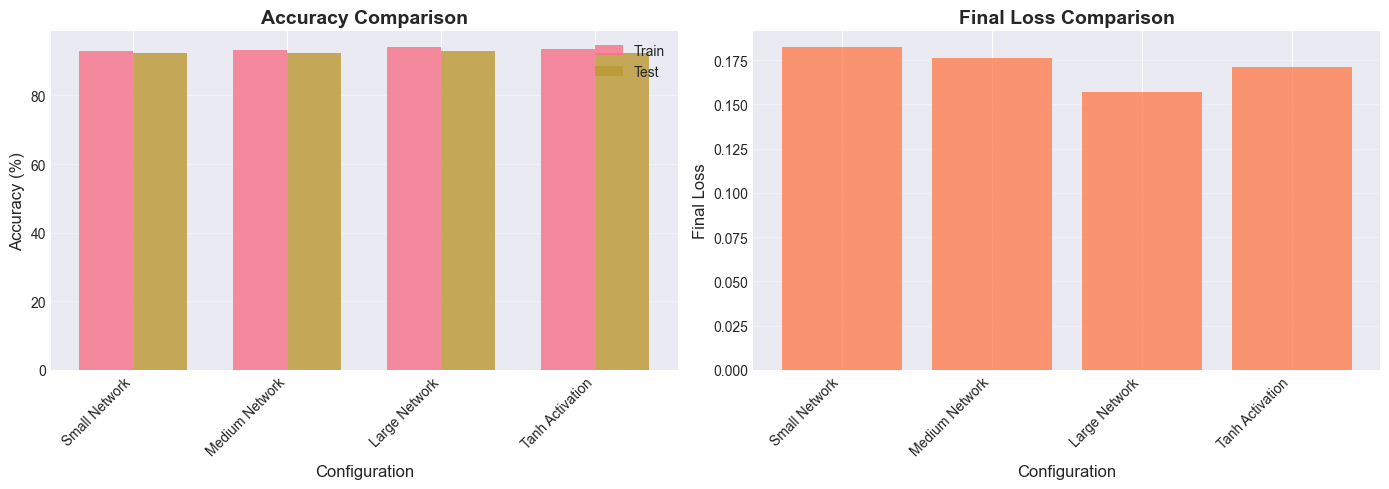

In [18]:
# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
x = np.arange(len(results))
width = 0.35
train_accs = [float(r['Train Acc (%)']) for r in results]
test_accs = [float(r['Test Acc (%)']) for r in results]

axes[0].bar(x - width/2, train_accs, width, label='Train', alpha=0.8)
axes[0].bar(x + width/2, test_accs, width, label='Test', alpha=0.8)
axes[0].set_xlabel('Configuration', fontsize=12)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels([r['Configuration'] for r in results], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Loss comparison
losses = [float(r['Loss']) for r in results]
axes[1].bar(range(len(results)), losses, color='coral', alpha=0.8)
axes[1].set_xlabel('Configuration', fontsize=12)
axes[1].set_ylabel('Final Loss', fontsize=12)
axes[1].set_title('Final Loss Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(len(results)))
axes[1].set_xticklabels([r['Configuration'] for r in results], rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
# Phần 2: Bài toán Hồi quy - SAT-GPA Dataset

## 2.1. Giới thiệu Dataset
Dataset chứa điểm SAT và GPA của sinh viên:
- **SAT**: Điểm thi SAT (1400-1800)
- **GPA**: Điểm trung bình (GPA 2.0-4.0)

In [19]:
# Load dataset
df_sat = pd.read_csv('SAT_GPA.csv')

print("=" * 60)
print("THÔNG TIN DATASET SAT-GPA")
print("=" * 60)
print(f"Số lượng mẫu: {df_sat.shape[0]}")
print(f"Số lượng đặc trưng: {df_sat.shape[1] - 1}")
print(f"\nCác cột: {list(df_sat.columns)}")

# Hiển thị mẫu
print("\n" + "="*60)
print("10 MẪU ĐẦU TIÊN")
print("="*60)
print(df_sat.head(10))

THÔNG TIN DATASET SAT-GPA
Số lượng mẫu: 84
Số lượng đặc trưng: 1

Các cột: ['SAT', 'GPA']

10 MẪU ĐẦU TIÊN
    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83
5  1670  2.91
6  1764  3.00
7  1764  3.00
8  1792  3.01
9  1850  3.01


In [20]:
# Thống kê mô tả
print("=" * 60)
print("THỐNG KÊ MÔ TẢ")
print("=" * 60)
print(df_sat.describe())

# Correlation
print("\n" + "="*60)
print("HỆ SỐ TƯƠNG QUAN")
print("="*60)
correlation = df_sat.corr()['GPA']['SAT']
print(f"Correlation giữa SAT và GPA: {correlation:.4f}")

THỐNG KÊ MÔ TẢ
               SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000

HỆ SỐ TƯƠNG QUAN
Correlation giữa SAT và GPA: 0.6372


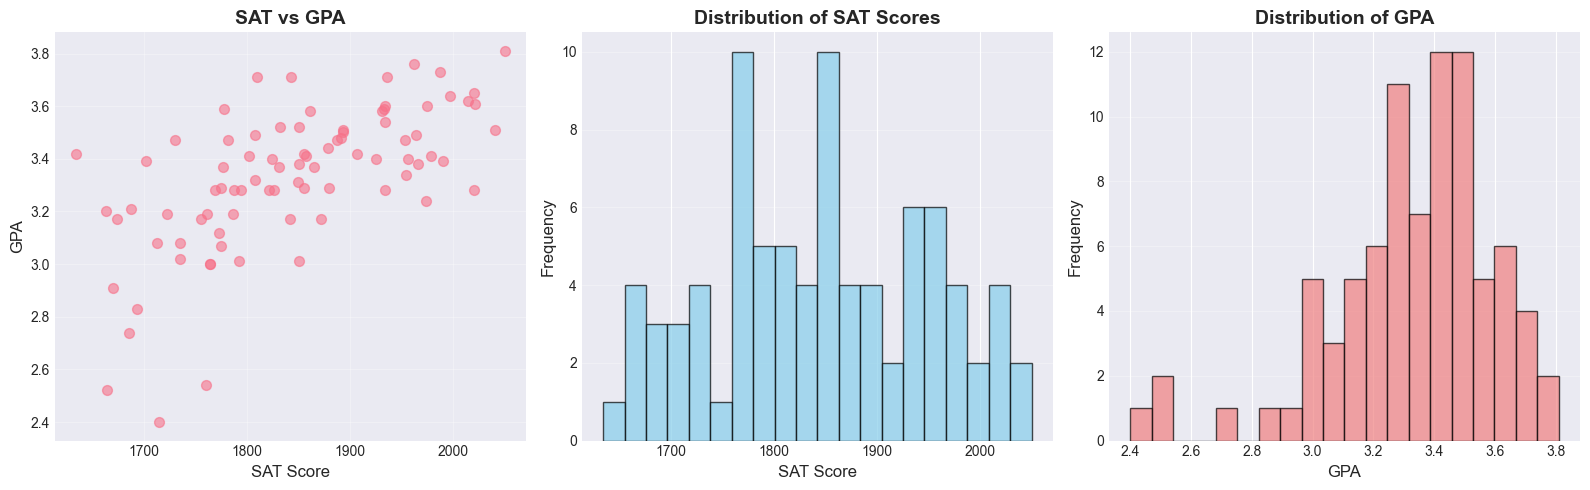

In [21]:
# Visualize dữ liệu
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Scatter plot
axes[0].scatter(df_sat['SAT'], df_sat['GPA'], alpha=0.6, s=50)
axes[0].set_xlabel('SAT Score', fontsize=12)
axes[0].set_ylabel('GPA', fontsize=12)
axes[0].set_title('SAT vs GPA', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Distribution of SAT
axes[1].hist(df_sat['SAT'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('SAT Score', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of SAT Scores', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Distribution of GPA
axes[2].hist(df_sat['GPA'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('GPA', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Distribution of GPA', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 2.2. Tiền xử lý dữ liệu

In [22]:
# Tách features và target
X_sat = df_sat[['SAT']].values
y_sat = df_sat['GPA'].values

print("=" * 60)
print("THÔNG TIN SAU KHI TÁCH DỮ LIỆU")
print("=" * 60)
print(f"Shape của X: {X_sat.shape}")
print(f"Shape của y: {y_sat.shape}")

THÔNG TIN SAU KHI TÁCH DỮ LIỆU
Shape của X: (84, 1)
Shape của y: (84,)


In [25]:
# Chia train-test với tỷ lệ 80-20
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42
)

print("=" * 60)
print("CHIA TRAIN-TEST SET")
print("=" * 60)
print(f"Training set: {X_train_sat.shape[0]} mẫu ({X_train_sat.shape[0]/len(X_sat)*100:.1f}%)")
print(f"Test set: {X_test_sat.shape[0]} mẫu ({X_test_sat.shape[0]/len(X_sat)*100:.1f}%)")

CHIA TRAIN-TEST SET
Training set: 67 mẫu (79.8%)
Test set: 17 mẫu (20.2%)


In [26]:
# Chuẩn hóa dữ liệu
scaler_sat = StandardScaler()
X_train_sat_scaled = scaler_sat.fit_transform(X_train_sat)
X_test_sat_scaled = scaler_sat.transform(X_test_sat)

print("=" * 60)
print("CHUẨN HÓA DỮ LIỆU (StandardScaler)")
print("=" * 60)
print(f"\nTrước khi chuẩn hóa:")
print(f"Mean: {X_train_sat.mean():.2f}")
print(f"Std: {X_train_sat.std():.2f}")
print(f"\nSau khi chuẩn hóa:")
print(f"Mean: {X_train_sat_scaled.mean():.6f}")
print(f"Std: {X_train_sat_scaled.std():.6f}")

CHUẨN HÓA DỮ LIỆU (StandardScaler)

Trước khi chuẩn hóa:
Mean: 1848.70
Std: 105.98

Sau khi chuẩn hóa:
Mean: -0.000000
Std: 1.000000


## 2.3. Xây dựng và Huấn luyện MLP Regressor

In [27]:
# Khởi tạo MLP Regressor
mlp_sat = MLPRegressor(
    hidden_layer_sizes=(50, 25),   # 2 hidden layers
    activation='relu',              # Hàm kích hoạt ReLU
    solver='adam',                  # Optimizer Adam
    alpha=0.0001,                   # L2 regularization
    learning_rate='adaptive',       # Learning rate thích nghi
    learning_rate_init=0.01,        # Learning rate ban đầu
    max_iter=1000,                  # Số epoch tối đa
    random_state=42,
    verbose=True,                   # Hiển thị quá trình training
    early_stopping=True,            # Dừng sớm
    validation_fraction=0.1         # 10% training set làm validation
)

print("=" * 60)
print("CẤU TRÚC MLP REGRESSOR")
print("=" * 60)
print(f"Input layer: 1 neuron (SAT score)")
print(f"Hidden layer 1: 50 neurons (ReLU)")
print(f"Hidden layer 2: 25 neurons (ReLU)")
print(f"Output layer: 1 neuron (GPA - Linear)")
print(f"\nOptimizer: Adam")
print(f"Learning rate: 0.01 (adaptive)")
print(f"Regularization: L2 (alpha=0.0001)")
print(f"Max iterations: 1000")
print("\n" + "="*60)
print("BẮT ĐẦU HUẤN LUYỆN MÔ HÌNH")
print("="*60)

CẤU TRÚC MLP REGRESSOR
Input layer: 1 neuron (SAT score)
Hidden layer 1: 50 neurons (ReLU)
Hidden layer 2: 25 neurons (ReLU)
Output layer: 1 neuron (GPA - Linear)

Optimizer: Adam
Learning rate: 0.01 (adaptive)
Regularization: L2 (alpha=0.0001)
Max iterations: 1000

BẮT ĐẦU HUẤN LUYỆN MÔ HÌNH


In [28]:
# Huấn luyện mô hình
mlp_sat.fit(X_train_sat_scaled, y_train_sat)

print("\n" + "="*60)
print("HOÀN THÀNH HUẤN LUYỆN")
print("="*60)
print(f"Số iterations thực tế: {mlp_sat.n_iter_}")
print(f"Loss cuối cùng: {mlp_sat.loss_:.6f}")
print(f"Số layers: {mlp_sat.n_layers_}")

Iteration 1, loss = 7.37744249
Validation score: -477.056556
Iteration 2, loss = 6.15858882
Validation score: -402.955401
Iteration 3, loss = 5.09068810
Validation score: -335.396471
Iteration 4, loss = 4.15941356
Validation score: -275.320891
Iteration 5, loss = 3.35126952
Validation score: -221.553956
Iteration 6, loss = 2.62498976
Validation score: -171.960314
Iteration 7, loss = 1.97732313
Validation score: -125.232953
Iteration 8, loss = 1.39594936
Validation score: -82.856214
Iteration 9, loss = 0.90700596
Validation score: -47.306897
Iteration 10, loss = 0.54699341
Validation score: -21.008347
Iteration 11, loss = 0.34571449
Validation score: -5.995221
Iteration 12, loss = 0.30983346
Validation score: -2.311414
Iteration 13, loss = 0.40728395
Validation score: -6.737996
Iteration 14, loss = 0.56416842
Validation score: -13.773429
Iteration 15, loss = 0.69402015
Validation score: -18.823637
Iteration 16, loss = 0.74110713
Validation score: -19.885802
Iteration 17, loss = 0.697430

## 2.4. Đánh giá mô hình

In [29]:
# Dự đoán
y_train_pred_sat = mlp_sat.predict(X_train_sat_scaled)
y_test_pred_sat = mlp_sat.predict(X_test_sat_scaled)

# Tính các metrics
train_r2 = r2_score(y_train_sat, y_train_pred_sat)
test_r2 = r2_score(y_test_sat, y_test_pred_sat)

train_mse = mean_squared_error(y_train_sat, y_train_pred_sat)
test_mse = mean_squared_error(y_test_sat, y_test_pred_sat)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train_sat, y_train_pred_sat)
test_mae = mean_absolute_error(y_test_sat, y_test_pred_sat)

print("=" * 60)
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH REGRESSION")
print("=" * 60)
print(f"\nTraining Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")

KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH REGRESSION

Training Set:
  R² Score: -10.2368
  MSE: 0.7384
  RMSE: 0.8593
  MAE: 0.6145

Test Set:
  R² Score: -8.3113
  MSE: 0.9212
  RMSE: 0.9598
  MAE: 0.6804


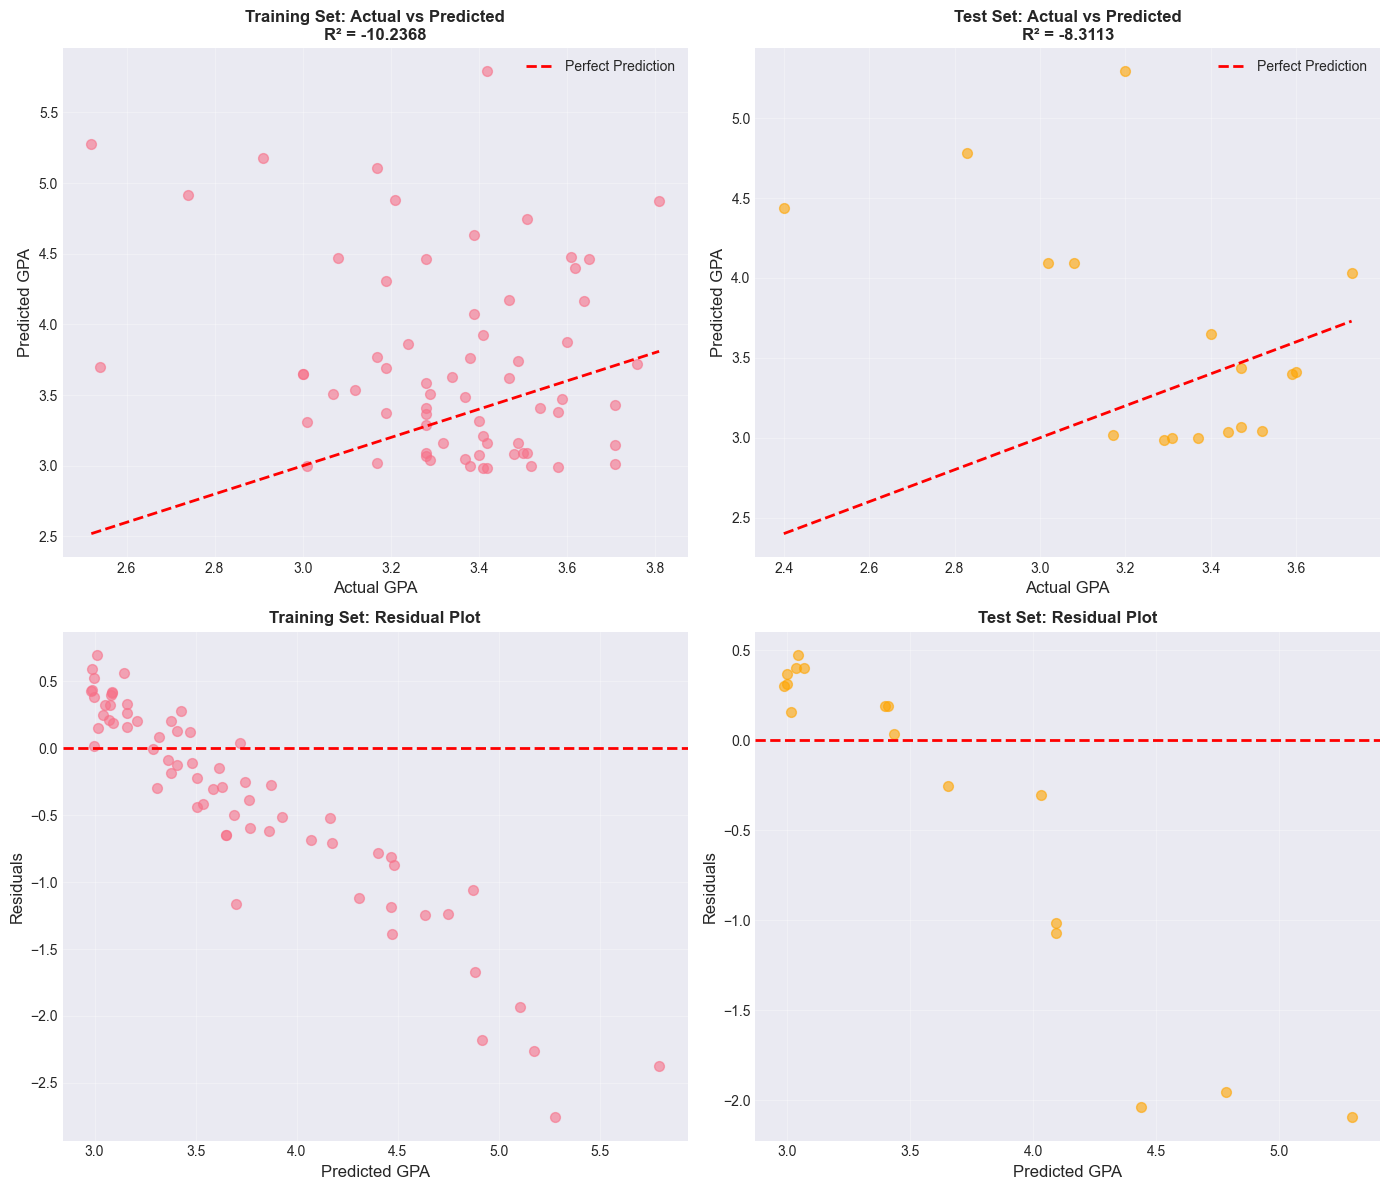

In [30]:
# Visualize kết quả
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Actual vs Predicted (Training)
axes[0, 0].scatter(y_train_sat, y_train_pred_sat, alpha=0.6, s=50)
axes[0, 0].plot([y_train_sat.min(), y_train_sat.max()], 
                [y_train_sat.min(), y_train_sat.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual GPA', fontsize=12)
axes[0, 0].set_ylabel('Predicted GPA', fontsize=12)
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}', 
                    fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted (Test)
axes[0, 1].scatter(y_test_sat, y_test_pred_sat, alpha=0.6, s=50, color='orange')
axes[0, 1].plot([y_test_sat.min(), y_test_sat.max()], 
                [y_test_sat.min(), y_test_sat.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual GPA', fontsize=12)
axes[0, 1].set_ylabel('Predicted GPA', fontsize=12)
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}', 
                    fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals (Training)
residuals_train = y_train_sat - y_train_pred_sat
axes[1, 0].scatter(y_train_pred_sat, residuals_train, alpha=0.6, s=50)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted GPA', fontsize=12)
axes[1, 0].set_ylabel('Residuals', fontsize=12)
axes[1, 0].set_title('Training Set: Residual Plot', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals (Test)
residuals_test = y_test_sat - y_test_pred_sat
axes[1, 1].scatter(y_test_pred_sat, residuals_test, alpha=0.6, s=50, color='orange')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted GPA', fontsize=12)
axes[1, 1].set_ylabel('Residuals', fontsize=12)
axes[1, 1].set_title('Test Set: Residual Plot', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

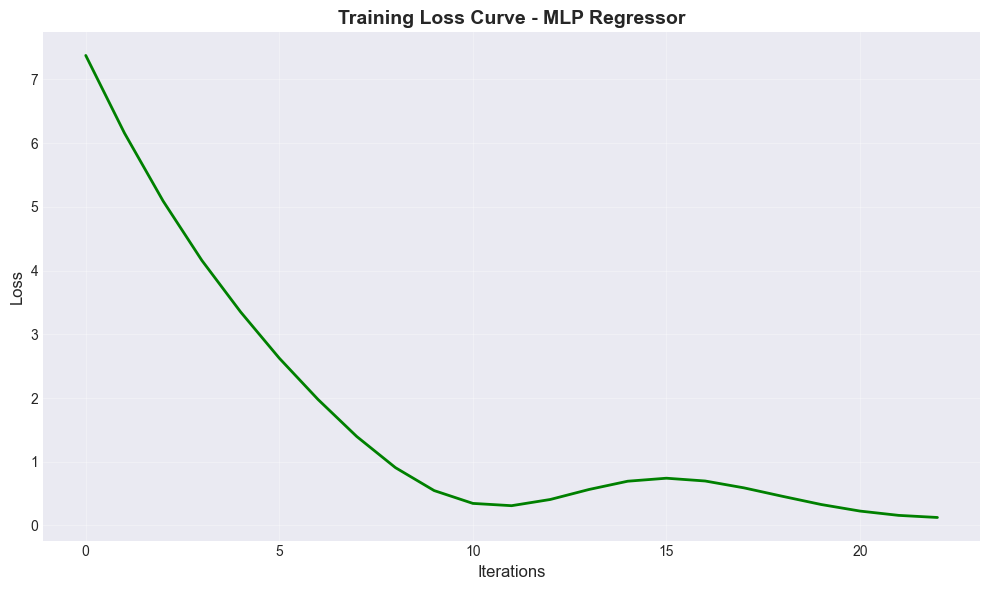

Final Training Loss: 0.124714


In [31]:
# Vẽ đồ thị Loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_sat.loss_curve_, linewidth=2, color='green')
plt.title('Training Loss Curve - MLP Regressor', fontsize=14, fontweight='bold')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final Training Loss: {mlp_sat.loss_:.6f}")

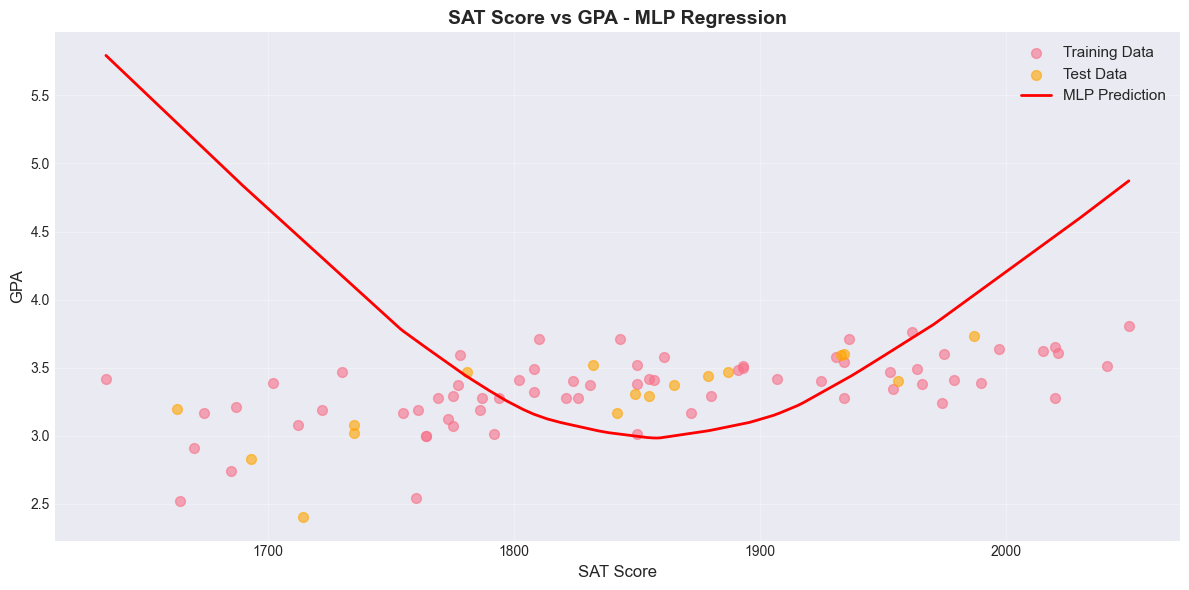

In [32]:
# Vẽ regression line trên toàn bộ dữ liệu
plt.figure(figsize=(12, 6))

# Generate smooth curve
sat_range = np.linspace(X_sat.min(), X_sat.max(), 300).reshape(-1, 1)
sat_range_scaled = scaler_sat.transform(sat_range)
gpa_pred = mlp_sat.predict(sat_range_scaled)

# Plot
plt.scatter(X_train_sat, y_train_sat, alpha=0.6, s=50, label='Training Data')
plt.scatter(X_test_sat, y_test_sat, alpha=0.6, s=50, color='orange', label='Test Data')
plt.plot(sat_range, gpa_pred, 'r-', linewidth=2, label='MLP Prediction')
plt.xlabel('SAT Score', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.title('SAT Score vs GPA - MLP Regression', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2.5. Dự đoán với dữ liệu mới

In [33]:
# Dự đoán GPA cho các điểm SAT cụ thể
new_sat_scores = np.array([1500, 1600, 1700, 1750, 1800]).reshape(-1, 1)
new_sat_scaled = scaler_sat.transform(new_sat_scores)
predicted_gpa = mlp_sat.predict(new_sat_scaled)

print("=" * 60)
print("DỰ ĐOÁN GPA CHO ĐIỂM SAT MỚI")
print("=" * 60)
for sat, gpa in zip(new_sat_scores.flatten(), predicted_gpa):
    print(f"SAT: {sat} => Predicted GPA: {gpa:.2f}")

DỰ ĐOÁN GPA CHO ĐIỂM SAT MỚI
SAT: 1500 => Predicted GPA: 8.20
SAT: 1600 => Predicted GPA: 6.39
SAT: 1700 => Predicted GPA: 4.67
SAT: 1750 => Predicted GPA: 3.85
SAT: 1800 => Predicted GPA: 3.23


---
# Phần 3: So sánh MLP với các mô hình khác

In [34]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Danh sách các mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'MLP': mlp_sat
}

comparison_results = []

print("=" * 70)
print("SO SÁNH CÁC MÔ HÌNH REGRESSION")
print("=" * 70)

for name, model in models.items():
    if name != 'MLP':  # MLP đã được train rồi
        print(f"\nĐang huấn luyện: {name}...")
        model.fit(X_train_sat_scaled, y_train_sat)
    
    # Dự đoán
    y_pred_train = model.predict(X_train_sat_scaled)
    y_pred_test = model.predict(X_test_sat_scaled)
    
    # Tính metrics
    train_r2 = r2_score(y_train_sat, y_pred_train)
    test_r2 = r2_score(y_test_sat, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test_sat, y_pred_test))
    test_mae = mean_absolute_error(y_test_sat, y_pred_test)
    
    comparison_results.append({
        'Model': name,
        'Train R²': f"{train_r2:.4f}",
        'Test R²': f"{test_r2:.4f}",
        'Test RMSE': f"{test_rmse:.4f}",
        'Test MAE': f"{test_mae:.4f}"
    })

# Hiển thị kết quả
comparison_df = pd.DataFrame(comparison_results)
print("\n" + "="*70)
print("KẾT QUẢ SO SÁNH")
print("="*70)
print(comparison_df.to_string(index=False))

SO SÁNH CÁC MÔ HÌNH REGRESSION

Đang huấn luyện: Linear Regression...

Đang huấn luyện: Ridge Regression...

Đang huấn luyện: Decision Tree...

Đang huấn luyện: Random Forest...

KẾT QUẢ SO SÁNH
            Model Train R² Test R² Test RMSE Test MAE
Linear Regression   0.3687  0.4695    0.2291   0.1627
 Ridge Regression   0.3686  0.4651    0.2301   0.1634
    Decision Tree   0.7913 -0.1221    0.3332   0.2598
    Random Forest   0.7514  0.2349    0.2751   0.1998
              MLP -10.2368 -8.3113    0.9598   0.6804

KẾT QUẢ SO SÁNH
            Model Train R² Test R² Test RMSE Test MAE
Linear Regression   0.3687  0.4695    0.2291   0.1627
 Ridge Regression   0.3686  0.4651    0.2301   0.1634
    Decision Tree   0.7913 -0.1221    0.3332   0.2598
    Random Forest   0.7514  0.2349    0.2751   0.1998
              MLP -10.2368 -8.3113    0.9598   0.6804


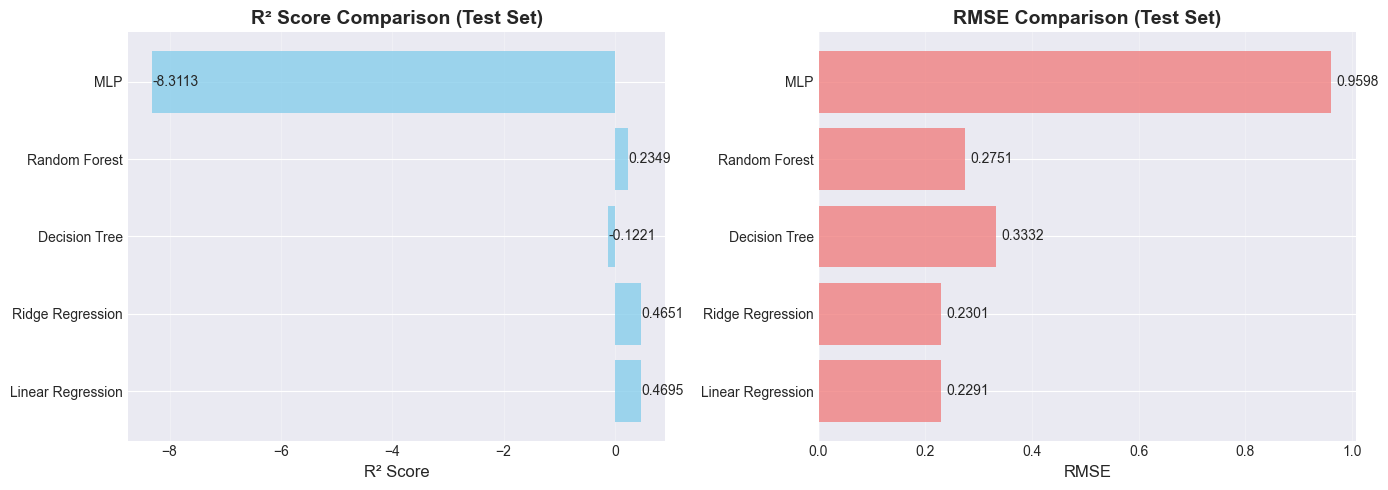

In [35]:
# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

model_names = [r['Model'] for r in comparison_results]
test_r2_scores = [float(r['Test R²']) for r in comparison_results]
test_rmse_scores = [float(r['Test RMSE']) for r in comparison_results]

# R² comparison
axes[0].barh(model_names, test_r2_scores, color='skyblue', alpha=0.8)
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_title('R² Score Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(test_r2_scores):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center')

# RMSE comparison
axes[1].barh(model_names, test_rmse_scores, color='lightcoral', alpha=0.8)
axes[1].set_xlabel('RMSE', fontsize=12)
axes[1].set_title('RMSE Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(test_rmse_scores):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

---
# Tổng kết

## Các điểm chính đã thực hiện:

### 1. Bài toán Phân loại (Dry Bean Dataset):
- Load và khám phá dataset với 7 loại đậu
- Tiền xử lý: Label Encoding, chuẩn hóa dữ liệu
- Xây dựng MLP Classifier với kiến trúc 16-100-50-7
- Đánh giá với Confusion Matrix, Classification Report
- So sánh các cấu hình khác nhau

### 2. Bài toán Hồi quy (SAT-GPA Dataset):
- Load và phân tích mối quan hệ SAT-GPA
- Xây dựng MLP Regressor với kiến trúc 1-50-25-1
- Đánh giá với R², MSE, RMSE, MAE
- Visualize kết quả dự đoán và residuals
- So sánh với các mô hình Linear Regression, Decision Tree, Random Forest

### 3. Kiến thức về MLP:
- **Activation functions**: ReLU, tanh, logistic
- **Optimizers**: Adam, SGD, L-BFGS
- **Regularization**: L2 penalty (alpha)
- **Learning rate**: Adaptive, constant, invscaling
- **Early stopping**: Ngăn overfitting

## Kết luận:
- MLP có khả năng học các mối quan hệ phi tuyến phức tạp
- Cần chuẩn hóa dữ liệu trước khi training
- Early stopping giúp tránh overfitting
- Việc chọn kiến trúc mạng phù hợp rất quan trọng